In [28]:
library(rethinking)
options(repr.plot.width=4, repr.plot.height=4)

In [23]:
## R code 4.26
data(Howell1)
d <- Howell1
d2 <- d[ d$age >= 18 , ]

In [24]:
## R code 4.31
# quap simulates from a mutilvariate normal
# because there is more than 1 prior aka unobserved variable.
# multivariate norm was just used here for illustrative purposes on
# how samples are generated from the model.
m4.2 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu ~ dnorm( 178 , 0.1 ) ,
        sigma ~ dunif( 0 , 50 )
    ) , data=d2 )
precis( m4.2 )

,mean,sd,5.5%,94.5%
mu,177.86375,0.1002354,177.70356,178.02395
sigma,24.51758,0.9289246,23.03297,26.00218


# Thoughts:
- This generates N = 100 of model lines f(x) = a +b*(xi-xbar) 
- a & b are randomly generated rnorm.
- xbar is from the data; mean of weight.
- x is from the curve(distribution(x))
- btw min weight and max weight in data.

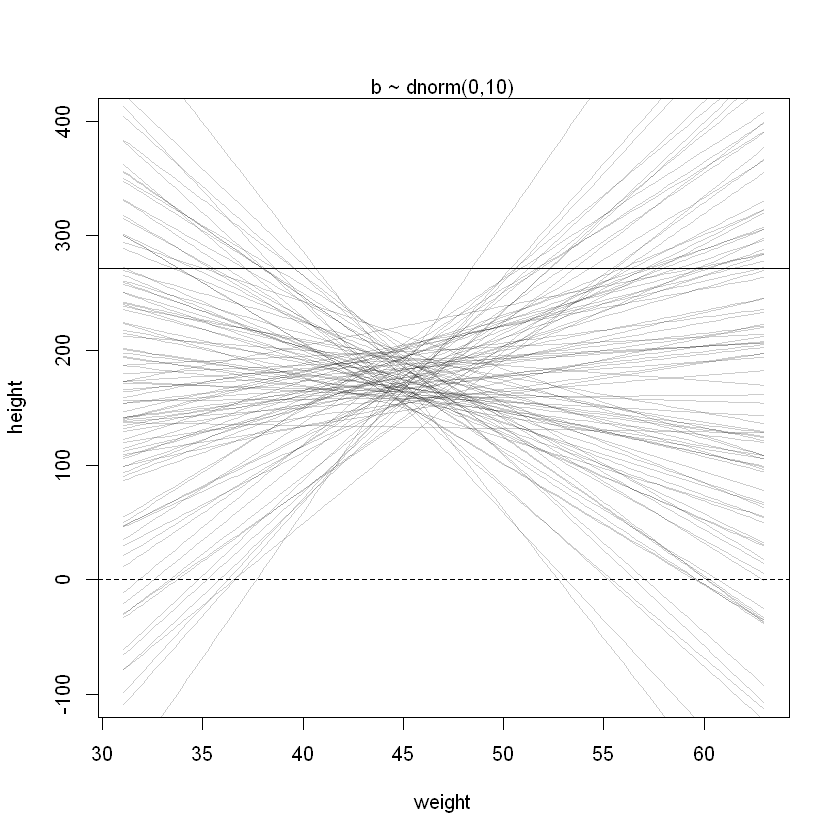

In [26]:
## R code 4.38
set.seed(2971)
N <- 100    # 100 lines to generate.
a <- rnorm( N , 178 , 20 )
b <- rnorm( N , 0 , 10 )

## R code 4.39
plot( NULL , xlim=range(d2$weight) , ylim=c(-100,400) ,
    xlab="weight" , ylab="height" )
abline( h=0 , lty=2 )
abline( h=272 , lty=1 , lwd=0.5 )
mtext( "b ~ dnorm(0,10)" )
xbar <- mean(d2$weight)
for ( i in 1:N ) curve( a[i] + b[i]*(x - xbar) ,
    from=min(d2$weight) , to=max(d2$weight) , add=TRUE ,
    col=col.alpha("black",0.2) )

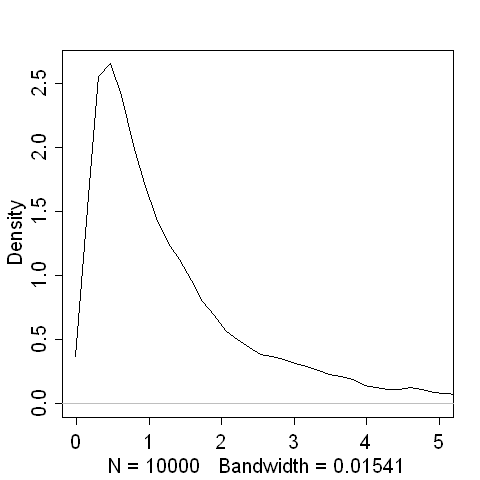

In [29]:
b <- rlnorm( 1e4 , 0 , 1 )
dens( b , xlim=c(0,5) , adj=0.1 )

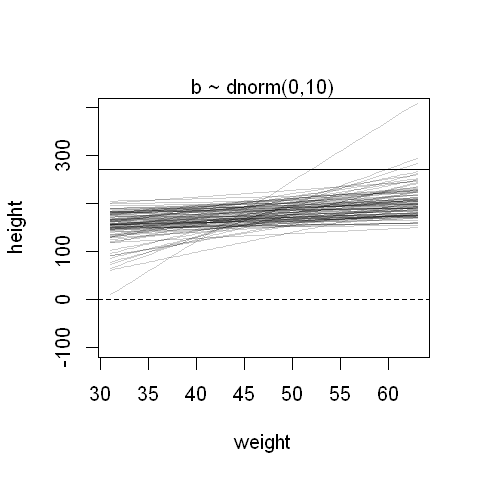

In [31]:
## R code 4.38
set.seed(2971)
N <- 100    # 100 lines to generate.
a <- rnorm( N , 178 , 20 )
b <- rlnorm( N , 0 , 1 )

## R code 4.39
plot( NULL , xlim=range(d2$weight) , ylim=c(-100,400) ,
    xlab="weight" , ylab="height" )
abline( h=0 , lty=2 )
abline( h=272 , lty=1 , lwd=0.5 )
mtext( "b ~ dnorm(0,10)" )
xbar <- mean(d2$weight)
for ( i in 1:N ) curve( a[i] + b[i]*(x - xbar) ,
    from=min(d2$weight) , to=max(d2$weight) , add=TRUE ,
    col=col.alpha("black",0.2) )

# Thoughts:
- The above shows the prior predictive distribution.
- Before adding any data, we make sure that the model is in 
- the predictive space given what we know about the science/business.
- Then introduce the data.

# There are 2 types of uncertainty:
- Uncertainty of parameter values (e.g. mu, sigma, lambda).
- Uncertainty of prediction/sampling, the actual value that you will observe (e.g. prediction).
- predictions are still model dependent not ontological. so making prdeictions may not always make sense to do.

# Likelihood and Link need to be in the same units
height(cm) ~ Normal(mu.cm,sd.cm) -- Likelihood <br>
mu.cm = a.cm + b.cm.kg * (x.kg - xbar.kg) -- Link need mu in cm to match height cm.

# Lecture 04 2019

## Thoughts
- Link - This function computes the value of each linear model at each sample for each case in the data.
- Inverse link functions are applied, so that for example a logit link linear model produces probabilities, using the logistic transform.
- Sim pushes Link through rnorm,rbinom, random variable generator to get predictions.
- No scientific meaning with boundary. 89% 95%
- Additive are linear so curves